In [1]:
%load_ext autoreload
%autoreload 2

import os
import seaborn as sns
from keras.layers import Dense, Activation
from utils_keras.traceable_model import TraceableModel
from utils_keras.traceable_model import load_result

sns.set_style('whitegrid')

Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
class IrisClassifier(TraceableModel):
    """
    A simple NN with one hidden layer to classify the iris dataset,
    reprsented as a TraceableModel subclass.  We will use it to save
    and visualize the progress of training this model.
    """
    def __init__(self):
        super().__init__(name='IRIS_CLASSIFIER')
        self.add(Dense(8, input_shape=(4,)))
        self.add(Activation('sigmoid'))
        self.add(Dense(3))
        self.add(Activation('softmax'))
        self.compile(optimizer='adam', loss='categorical_crossentropy',
                     metrics=['accuracy'])

def classify_iris():
    """
    This function instantiates an IrisClassifier, trains it on the iris data,
    and saves the training metrics, model, and weights to file.  The process
    is repeated twice... loss and accuracy continue to improve after first
    training.
    """
    iris = sns.load_dataset('iris')
    X = iris.values[:, :4] # First 4 columns are features
    y = iris.values[:, 4] # Last (5th) column are the labels (iris type)
    ic = IrisClassifier()

    # Directory to save model, weights, and results
    dir_results ='/Users/bryanfry/repos/scr' 

    res1 = ic.train(X, y, batch_size=2, epochs=16, perform_one_hot_encoding=True,
             record_X_train=True, record_y_train=True, record_X_test=True,
             record_y_test=True, record_y_pred=True, random_state=42)

    # Save model and weights after first training
    ic.save_model_and_weights(dir_results)  
    
    # Save results of first training (Accuracy, less, timing, train/test split data)
    res1.save(dir_results, fn=None)  

    res2 = ic.train(X, y, batch_size=2, epochs=16, perform_one_hot_encoding=True,
             record_X_train=True, record_y_train=True, record_X_test=True,
             record_y_test=True, record_y_pred=True, random_state=43)

    # Save model and weights after first training
    ic.save_model_and_weights(dir_results) #.... as above, second training
    
    # Save results of first training (Accuracy, less, timing, train/test split data)
    res2.save(dir_results, fn=None)
    return (res1, res2)

### Train the IrisClassifier twice
This yields two TraceableResults objects, each covering 16 epochs of training

In [3]:
res1, res2 = classify_iris()

Train on 75 samples, validate on 75 samples
Epoch 1/16
75/75 [==============================] - 0s 2ms/step - loss: 1.4246 - acc: 0.3333 - val_loss: 1.3869 - val_acc: 0.3333
Epoch 2/16
75/75 [==============================] - 0s 893us/step - loss: 1.3616 - acc: 0.3333 - val_loss: 1.3266 - val_acc: 0.3333
Epoch 3/16
75/75 [==============================] - 0s 958us/step - loss: 1.3083 - acc: 0.3333 - val_loss: 1.2844 - val_acc: 0.3333
Epoch 4/16
75/75 [==============================] - 0s 1ms/step - loss: 1.2682 - acc: 0.3333 - val_loss: 1.2462 - val_acc: 0.3333
Epoch 5/16
75/75 [==============================] - 0s 999us/step - loss: 1.2318 - acc: 0.3333 - val_loss: 1.2119 - val_acc: 0.3333
Epoch 6/16
75/75 [==============================] - 0s 942us/step - loss: 1.2026 - acc: 0.3333 - val_loss: 1.1913 - val_acc: 0.3333
Epoch 7/16
75/75 [==============================] - 0s 953us/step - loss: 1.1796 - acc: 0.3333 - val_loss: 1.1680 - val_acc: 0.3333
Epoch 8/16
75/75 [==================

### Plot the model evolution over first 16 epochs

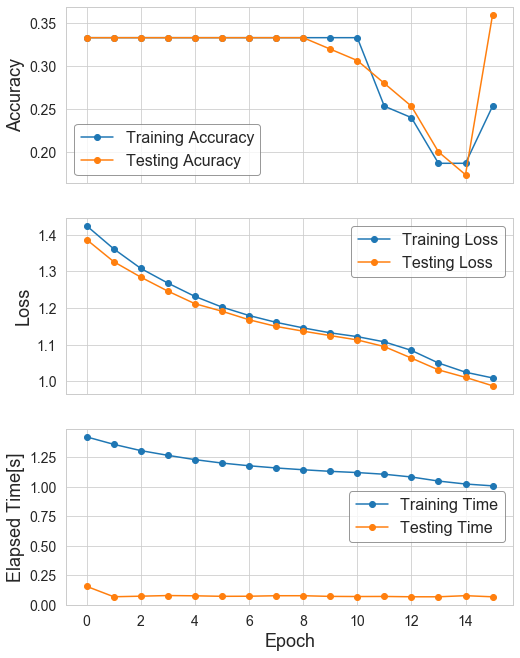

In [4]:
res1.plot_results();

### Plot the model evolution over second 16 epochs

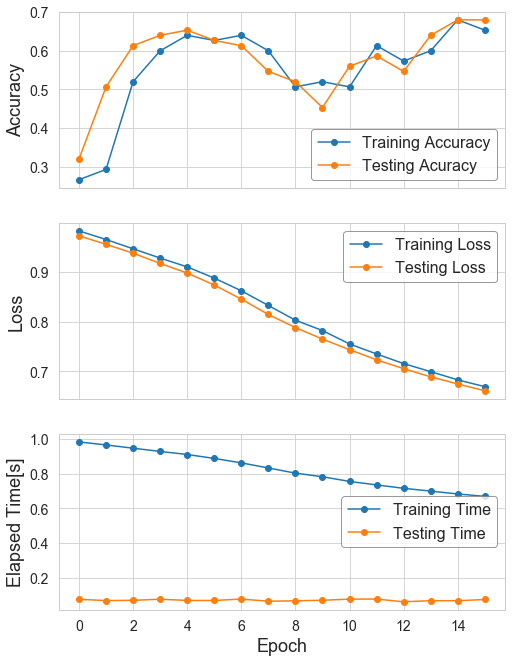

In [5]:
res2.plot_results();